# 0. data loading

In [ ]:
import pandas as pd

data_url = 'https://datamarket.es/media/samples/catastro-sample.csv'

df = pd.read_csv(data_url)

df.head()

,area,autonomous_region,description,has_doorman,has_garden,has_lift,has_parking,has_storage,has_swimming_pool,is_residential,...,street,area_item,floor,typology_item,door,total_floors,town,typology,year_built,shared_quota
0,130,"Madrid, Comunidad de",Esc.1 Bajo B,True,False,True,True,True,False,True,...,Calle Valle Del Baztan,11,-1,AAP,5,5.0,Torrejón de Ardoz,V,2012.0,0.0006
1,130,"Madrid, Comunidad de",Esc.7 3º B,True,False,True,True,True,False,True,...,Calle Valle Del Baztan,4,-1,AAL,111,5.0,Torrejón de Ardoz,V,2012.0,0.0002
2,82,"Madrid, Comunidad de",2º 03,False,False,False,False,False,False,True,...,Calle Santa Juliana,77,02,V,03,6.0,Madrid,V,1925.0,0.0452
3,165,"Madrid, Comunidad de",Inmueble,False,True,False,False,True,False,True,...,Calle Sicomoro (Del),58,01,V,01,3.0,Móstoles,V,2006.0,0.3515
4,14144,"Madrid, Comunidad de",Inmueble,NaN,NaN,NaN,NaN,NaN,NaN,False,...,Calle Alcala,1040,02,P,01,NaN,Madrid,O,NaN,NaN


In [ ]:
df.dtypes

area                     int64
autonomous_region       object
description             object
has_doorman             object
has_garden              object
has_lift                object
has_parking             object
has_storage             object
has_swimming_pool       object
is_residential            bool
latitude               float64
longitude              float64
neighbors_per_floor      int64
number                  object
postal_code              int64
province                object
reference               object
street                  object
area_item                int64
floor                   object
typology_item           object
door                    object
total_floors           float64
town                    object
typology                object
year_built             float64
shared_quota           float64
dtype: object

In [ ]:
df.shape

(60000, 27)

# 1. data preparation

In [ ]:
feature_cols = [
    'province',
    'area',
    'year_built',
]

categorical_cols = [
    'province',
]

target_col = 'has_swimming_pool'

In [ ]:
df = df[feature_cols + [target_col]]

df.head()

,province,area,year_built,has_swimming_pool
0,Madrid,130,2012.0,False
1,Madrid,130,2012.0,False
2,Madrid,82,1925.0,False
3,Madrid,165,2006.0,False
4,Madrid,14144,NaN,NaN


In [ ]:
df.isna().sum()

province                0
area                    0
year_built           6608
has_swimming_pool    6608
dtype: int64

In [ ]:
df.dropna(inplace=True)

len(df)

53392

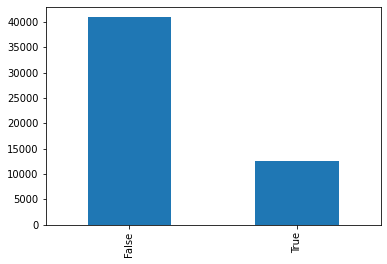

In [ ]:
df['has_swimming_pool'].value_counts().plot.bar();

In [ ]:
df['has_swimming_pool'].value_counts()

False    40903
True     12489
Name: has_swimming_pool, dtype: int64

In [ ]:
df_pos = df[df['has_swimming_pool'] == 1]
df_neg = df[df['has_swimming_pool'] == 0]

df = pd.concat((df_pos, df_neg.sample(len(df_pos), random_state=42)))

df['has_swimming_pool'].value_counts()

True     12489
False    12489
Name: has_swimming_pool, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df[categorical_cols] = enc.fit_transform(df[categorical_cols])

df.head()

,province,area,year_built,has_swimming_pool
5,7.0,104,2004.0,True
10,7.0,170,2005.0,True
14,7.0,96,2004.0,True
15,7.0,261,2019.0,True
19,7.0,261,1985.0,True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[feature_cols] = scaler.fit_transform(df[feature_cols])

df.head()

,province,area,year_built,has_swimming_pool
5,0.07848,-0.071643,0.393391,True
10,0.07848,-0.032883,0.416432,True
14,0.07848,-0.076341,0.393391,True
15,0.07848,0.020559,0.739014,True
19,0.07848,0.020559,-0.044399,True


In [ ]:
n_samples = 10

df = df.sample(n_samples, random_state=42)

df.shape

(10, 4)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7, 3), (3, 3), (7,), (3,))

# 2. modeling

## 2.1 Quantum

In [ ]:
!pip install qiskit-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 4.5 MB/s 
     |████████████████████████████████| 6.7 MB 19.4 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 
     |████████████████████████████████| 37.5 MB 41 kB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 943 kB 52.2 MB/s 
     |████████████████████████████████| 1.6 MB 42.7 MB/s 
     |████████████████████████████████| 112 kB 35.6 MB/s 


In [ ]:
!pip install qiskit-ibmq-provider

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 4.7 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 44.7 MB/s 
     |████████████████████████████████| 4.1 MB 35.1 MB/s 


In [ ]:
from qiskit import BasicAer

backend = BasicAer.get_backend('statevector_simulator')

backend

<StatevectorSimulatorPy('statevector_simulator')>

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('763f3d42e3016709be48fe645fc6bc9eb32905081ebac3f67c123f8278785d9231ee392a323554b6e0efac1c36d7cd24ef5ab2f506cef6ff3d1fe69a4d02b56f')

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider = IBMQ.load_account()

#backend=provider.get_backend('ibmq_belem')

backend = provider.get_backend('ibmq_manila')


ibmqfactory.load_account:WARNING:2022-08-07 18:27:15,939: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
from qiskit.utils import QuantumInstance

quantum_instance = QuantumInstance(backend)

quantum_instance

In [ ]:
num_qubits = len(feature_cols)

num_qubits

3

### 2.1.1 QSVC

In [ ]:
from qiskit.circuit.library import ZFeatureMap

feature_map = ZFeatureMap(feature_dimension=num_qubits)

feature_map

In [ ]:
from qiskit_machine_learning.kernels import QuantumKernel

qkernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

qkernel

In [ ]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=qkernel)

qsvc.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7f02c33552d0>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

### 2.1.2 QNNC

In [ ]:
from qiskit_machine_learning.neural_networks import TwoLayerQNN

qnn_architecture = TwoLayerQNN(num_qubits, quantum_instance=quantum_instance)

qnn_architecture

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title('Objective function vs iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Objective function')
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit.algorithms.optimizers import COBYLA

qnnc = NeuralNetworkClassifier(qnn_architecture, optimizer=COBYLA(maxiter=50), callback=callback_graph)

qnnc

In [ ]:
objective_func_vals = []

y_train_qnnc = y_train.copy()
y_train_qnnc[y_train_qnnc == 0] = -1

qnnc.fit(X_train, y_train_qnnc.values)

## 2.2 classical

### 2.2.1 SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

### 2.2.2 MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

# 3. Benchmarking

In [ ]:
from sklearn.metrics import classification_report

model_dict = {
    'QSVC': qsvc,
}

for model_id, model in model_dict.items():
    print(f'{model_id} report:')
    y_predict = model.predict(X_test)
    
    # if model_id == 'QNNC':
    #     y_predict[y_predict == -1] = 0
        
    print(classification_report(y_test, y_predict))


QSVC report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
